In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# Make the model object
regr = linear_model.LinearRegression()

In [56]:
df = pd.read_csv('to_ols.csv')

In [57]:
df.head()

,episode_id,season,episode,episode_name,user_votes,rating,unique_token_count,token_count,pct_unique_tokens,sentiment
0,1,1,1,Winter Is Coming,17132,8.9,800,3535,0.226,225
1,2,1,2,The Kingsroad,12945,8.7,1025,4367,0.235,164
2,3,1,3,Lord Snow,12201,8.6,1120,4621,0.242,208
3,4,1,4,"Cripples, Bastards, and Broken Things",11533,8.7,1335,6327,0.211,283
4,5,1,5,The Wolf and the Lion,12337,9.0,1329,6667,0.199,302


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x126b38450>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x128595050>]], dtype=object)

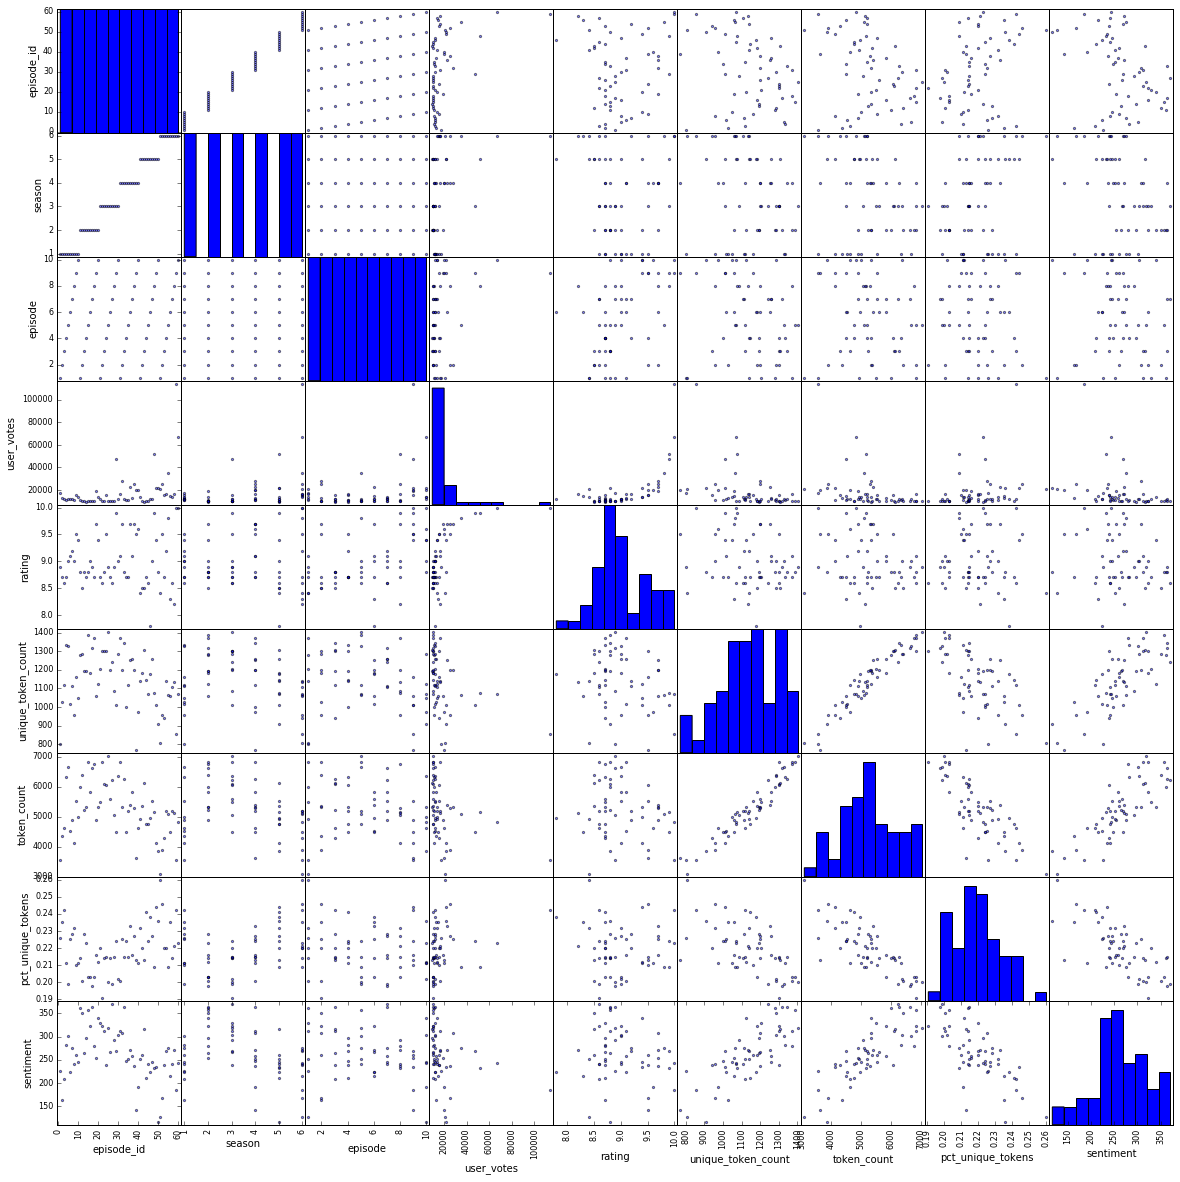

In [58]:
pd.scatter_matrix(df,figsize=(20,20))

Of interest:

- sentiment vs dialogue length
- sentiment vs dialogue uniqueness
- rating vs. user votes (maybe... probably not)

In [61]:
df.head()

,episode_id,season,episode,episode_name,user_votes,rating,unique_token_count,token_count,pct_unique_tokens,sentiment
0,1,1,1,Winter Is Coming,17132,8.9,800,3535,0.226,225
1,2,1,2,The Kingsroad,12945,8.7,1025,4367,0.235,164
2,3,1,3,Lord Snow,12201,8.6,1120,4621,0.242,208
3,4,1,4,"Cripples, Bastards, and Broken Things",11533,8.7,1335,6327,0.211,283
4,5,1,5,The Wolf and the Lion,12337,9.0,1329,6667,0.199,302


In [ ]:
from statsmodels.formula import api as smf

In [62]:
df.head()

,episode_id,season,episode,episode_name,user_votes,rating,unique_token_count,token_count,pct_unique_tokens,sentiment
0,1,1,1,Winter Is Coming,17132,8.9,800,3535,0.226,225
1,2,1,2,The Kingsroad,12945,8.7,1025,4367,0.235,164
2,3,1,3,Lord Snow,12201,8.6,1120,4621,0.242,208
3,4,1,4,"Cripples, Bastards, and Broken Things",11533,8.7,1335,6327,0.211,283
4,5,1,5,The Wolf and the Lion,12337,9.0,1329,6667,0.199,302


In [ ]:
from statsmodels.formula import api as smf

1786.32685611
[ 13.16001194]
                            OLS Regression Results                            
Dep. Variable:              sentiment   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     115.1
Date:                Wed, 27 Jul 2016   Prob (F-statistic):           2.15e-15
Time:                        12:49:59   Log-Likelihood:                -295.45
No. Observations:                  60   AIC:                             594.9
Df Residuals:                      58   BIC:                             599.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      -2.050

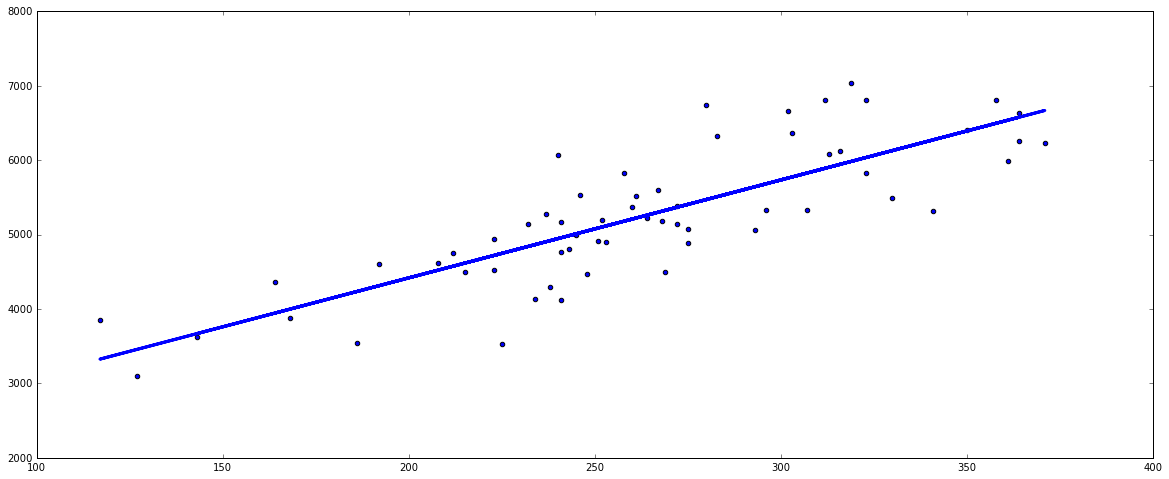

In [63]:
y = 'sentiment'
x = 'token_count'

lmfit = smf.ols('{} ~ {}'.format(y,x), data=df)
print regr.intercept_
print regr.coef_
print lmfit.fit().summary()

plt.figure(figsize=(20,8))
plt.scatter(df[[y]], df[x].values)
plt.plot(df[[y]], regr.predict(df[[y]]), color='blue', linewidth=3)
plt.show()

1786.32685611
[ 13.16001194]
                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     36.97
Date:                Wed, 27 Jul 2016   Prob (F-statistic):           1.00e-07
Time:                        12:50:01   Log-Likelihood:                -27.089
No. Observations:                  60   AIC:                             58.18
Df Residuals:                      58   BIC:                             62.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      8.6599  

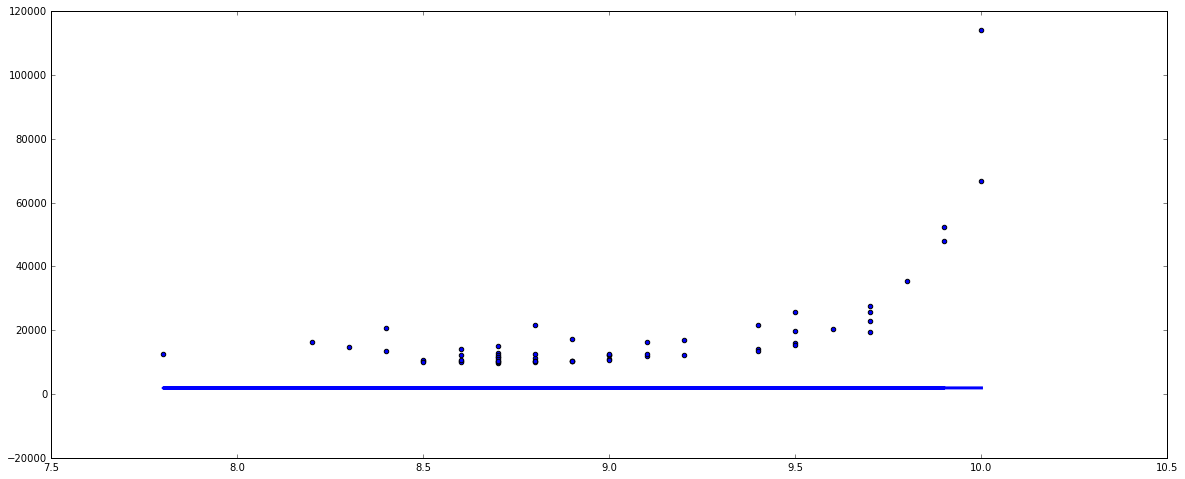

In [64]:
y = 'rating'
x = 'user_votes'

lmfit = smf.ols('{} ~ {}'.format(y,x), data=df)
print regr.intercept_
print regr.coef_
print lmfit.fit().summary()

plt.figure(figsize=(20,8))
plt.scatter(df[[y]], df[x].values)
plt.plot(df[[y]], regr.predict(df[[y]]), color='blue', linewidth=3)
plt.show()

1786.32685611
[ 13.16001194]
                            OLS Regression Results                            
Dep. Variable:              sentiment   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     54.77
Date:                Wed, 27 Jul 2016   Prob (F-statistic):           6.22e-10
Time:                        12:50:01   Log-Likelihood:                -308.31
No. Observations:                  60   AIC:                             620.6
Df Residuals:                      58   BIC:                             624.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept

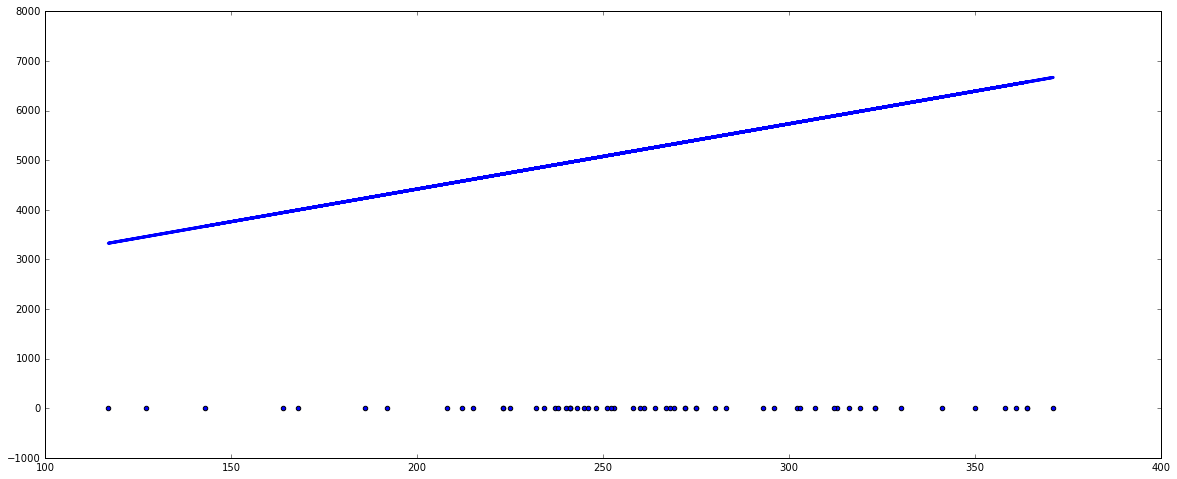

In [65]:
y = 'sentiment'
x = 'pct_unique_tokens'

lmfit = smf.ols('{} ~ {}'.format(y,x), data=df)
print regr.intercept_
print regr.coef_
print lmfit.fit().summary()

plt.figure(figsize=(20,8))
plt.scatter(df[[y]], df[x].values)
plt.plot(df[[y]], regr.predict(df[[y]]), color='blue', linewidth=3)
plt.show()

1786.32685611
[ 13.16001194]
                            OLS Regression Results                            
Dep. Variable:              sentiment   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     83.01
Date:                Wed, 27 Jul 2016   Prob (F-statistic):           8.71e-13
Time:                        12:50:20   Log-Likelihood:                -301.60
No. Observations:                  60   AIC:                             607.2
Df Residuals:                      58   BIC:                             611.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Interce

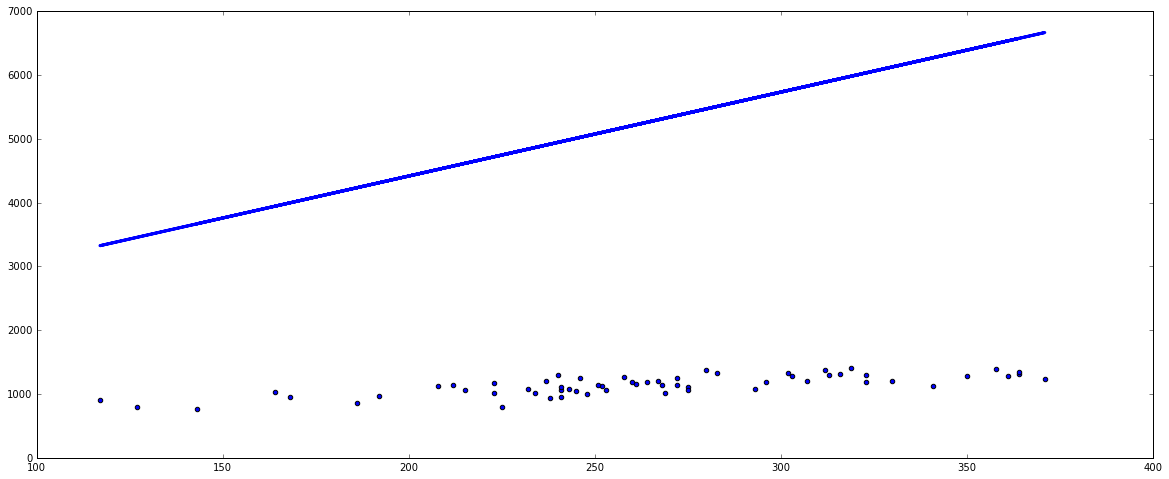

In [66]:
y = 'sentiment'
x = 'unique_token_count'

lmfit = smf.ols('{} ~ {}'.format(y,x), data=df)
print regr.intercept_
print regr.coef_
print lmfit.fit().summary()

plt.figure(figsize=(20,8))
plt.scatter(df[[y]], df[x].values)
plt.plot(df[[y]], regr.predict(df[[y]]), color='blue', linewidth=3)
plt.show()

---

# Not enough data?  Bad predictors?